## KoNLPy

In [42]:
import konlpy
konlpy.__version__

'0.5.2'

In [43]:
from konlpy.tag import Okt
okt = Okt()

In [44]:
okt.nouns('해당 에러가 발생하는 것을 알 수 있다')

['해당', '에러', '발생', '것', '알', '수']

### #여자친구_선물 워드 클라우드 만들기

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 10
mpl.rcParams['axes.unicode_minus'] = False

In [71]:
with open('data/gift.txt', 'r') as f :
    gift_text = f.read()

In [72]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [87]:
# 알파벳, 숫자 제거
import re
new_tokens = []
for token in tokens :
    text = re.sub('[A-Za-z0-9]', '', token)
    if text :
        new_tokens.append(text)

In [76]:
import nltk

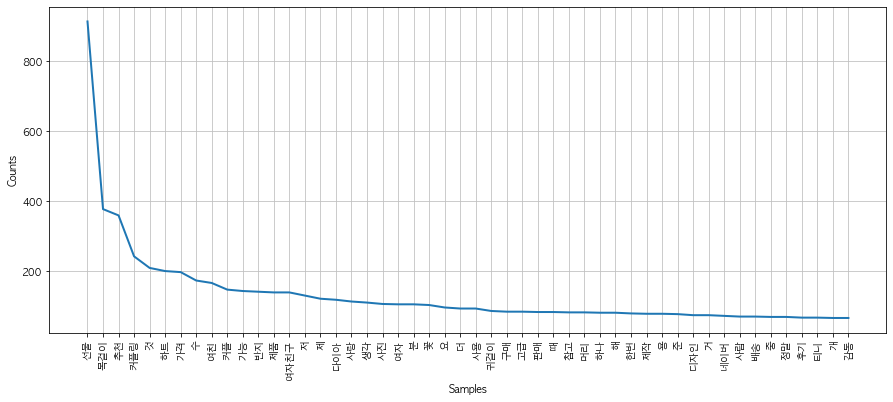

In [88]:
gf_gift = nltk.Text(new_tokens, name = 'present')
plt.figure(figsize = (15, 6))
gf_gift.plot(50)
plt.show()

In [89]:
stop_words = ['선물','추천','것','가격','수','여친','커플','가능','제품','여자친구','저','제','생각','여자','분','요','더','사용','구매','판매','때','참고','머리','하나','해','한번','제작','용','준','거','디자인','네이버','사람','배송','중','정말','후기','티니','개','감동','하트','사랑','세대','인기','상품','직접','선택','곳','끈','모양','마감','등','요즘','곱창','오늘','가지','남녀','그냥','이벤트','위','마음','부담','로티','남자','협찬','전','의미','변경','도움','색상','아래','포장','처','조금','하루','정도','처리','보시','독서','여성','가장','때문','정보','스타일','밍티풀','주소','쇼핑','링크','이니셜','기념일','헤어','질문','친구','스토어','아주','할인','미쁜','스']

new_tokens = [word for word in new_tokens if word not in stop_words]

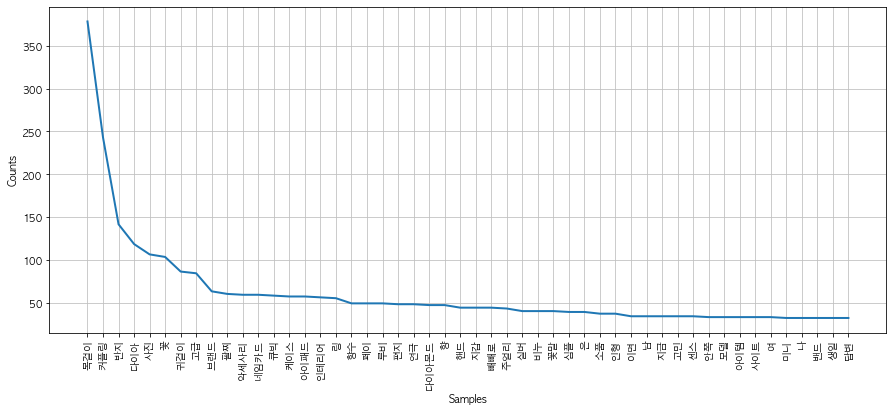

In [90]:
gf_gift = nltk.Text(new_tokens, name = 'present')
plt.figure(figsize = (15, 6))
gf_gift.plot(50)
plt.show()

In [91]:
# 워드클라우드 그리기
from PIL import Image
from wordcloud import WordCloud

In [92]:
data = gf_gift.vocab().most_common(300)

wc =WordCloud(
    font_path = '/Library/Fonts/NanumBarunpenRegular.ttf',
    relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))

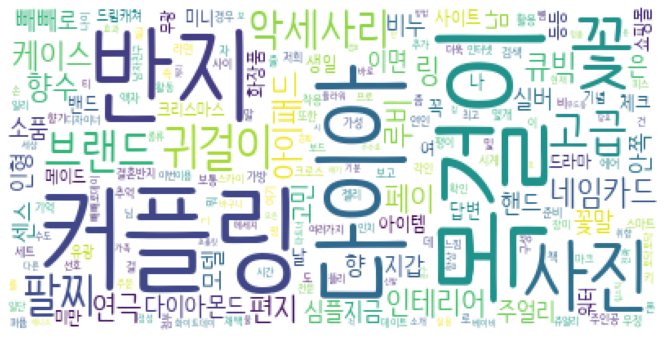

In [93]:
plt.figure(figsize = (12, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [94]:
mask = np.array(Image.open('data/heart.jpg'))
from wordcloud import ImageColorGenerator
image_colours = ImageColorGenerator(mask)

In [95]:
wc =WordCloud(
    font_path = '/Library/Fonts/NanumBarunpenRegular.ttf',
    relative_scaling = 0.2,
    background_color = 'white',
    min_font_size = 1, max_font_size = 100
).generate_from_frequencies(dict(data))
default_colours = wc.to_array()

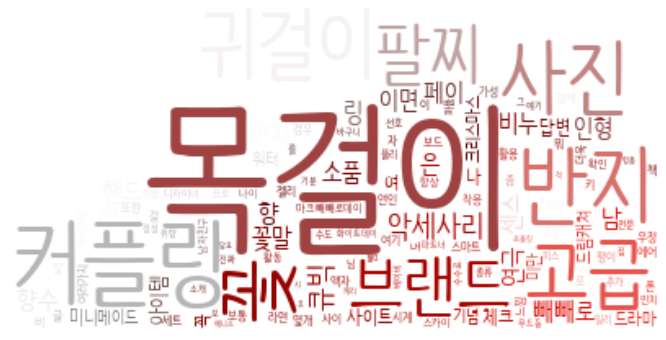

In [96]:
plt.figure(figsize = (12, 6))
plt.imshow(wc.recolor(color_func = image_colours), interpolation = 'bilinear')
plt.axis('off')
plt.show()